# Mobile Price Classification - Term Project

### Group 1:

* **Megi Xhafka**
* **Nihitha Patcha**
* **Tina Khazaee**
* **Terry Abraham**
* **Parthasarathy Chakravarthy Amit**
* **Lester Azinge**
* **Aniket Balayaan**
* **Kamryn Edwards**

**In real life we have a numerous variety of mobile phones and all of them have different features and specifications. According to that, predicting and estimating a mobile price is a decisive part of consumer strategy. We want to find the best solution about what should be the appropriate price so that the consumers will buy that product.
In this project our objective is to find a relation on how some of the features affect the price of mobiles. Price range is what we will predict, so it is our target value ‘y’ with values from 0 to 3, from low cost to very high cost.**


### Link for the dataset we have used:
https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification

### Description of the dataset:




*  **Battery_power** - Total energy a battery can store in one time measured in mAh
*   **Blue** - Has bluetooth or not
*   **Clock_speed** - Speed at which microprocessor executes instructions
*   **Dual_sim** - Has dual sim support or not
*   **Fc** - Front Camera mega pixels
*  **Four_g** - Has 4G or not
*  **Int_memory** - Internal Memory in Gigabytes
*   **M_dep** - Mobile Depth in cm
*   **Mobile_wt** - Weight of mobile phone
*   **N_cores** - Number of cores of processor
*   **Pc** - Primary Camera mega pixels
*   **Px_height** - Pixel Resolution Height
*   **Px_width** - Pixel Resolution Width
*   **Ram** - Random Access Memory in Mega 
*   **Touch_screen** - Has touch screen or not
*   **Wifi** - Has wifi or not
*  **Sc_h** - Screen Height of mobile in cm
*   **Sc_w** - Screen Width of mobile in cm
*   **Talk_time** - longest time that a single battery charge will last when you are
*   **Three_g** - Has 3G or not
*   **Wifi** - Has wifi or not
*  **Price_range** - This is the target variable with value of 0 - low cost, 1 - medium cost,
2 - high cost and 3 - very high cost.









In [1]:
#Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the dataset
df = pd.read_csv('train.csv')

#Return the first 5 rows of the DataFrame
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
#List of column names
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [4]:
#Number of features
len(df.columns)

21

In [5]:
#Number of rows(samples) and columns(features)
df.shape

(2000, 21)

# Preparing Data for Analysis

In [6]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
#Description of the data
df.describe()
df.describe().T # transpose

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


### *We found that the minimum value of Pixel Resolution Height "*px_height*" and Screen Width of mobile in cm "*sc_w*" can't be zero, so we will work on them.*

In [8]:
# Total phones with px_height = 0
print(len(df[df.px_height == 0]))
# Total phones with sc_w = 0
print(len(df[df.sc_w == 0]))

2
180


In [9]:
#We will assign mean values, instead of those zeros
df['px_height'][df[df.px_height == 0].index] = df.px_height.mean()
df['sc_w'][df[df.sc_w == 0].index] = df.sc_w.mean()

In [10]:
#Finding if we have any duplicate values
print("The number of duplicates is: ", len(df[df.duplicated()]))

The number of duplicates is:  0


In [11]:
#The number of unique values for each column
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [12]:
#Finding if we have missing values
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

### *We don't have missing values in our dataset.*

# Analyzing Data Features by vizualization

### 1. Checking the number of mobiles in the dataset in each price range

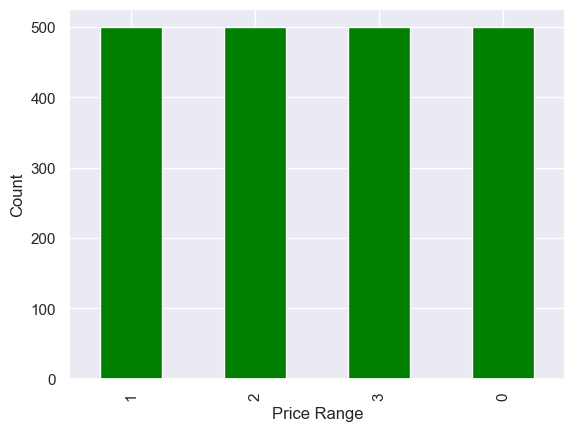

In [13]:
sns.set()
price_plot=df['price_range'].value_counts().plot(color = 'green',kind='bar')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

### *As it is seen on the figure, in each price range, we have the same number of mobile phones.*

### 2. Checking if mobile phones have bluetooth or not

<AxesSubplot: xlabel='blue', ylabel='price_range'>

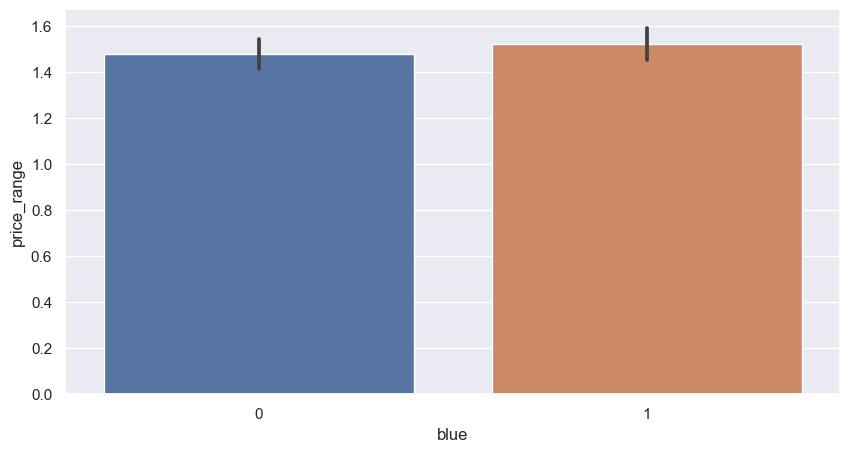

In [14]:
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(data=df,x='blue',y='price_range',ax=ax)

 ### *Approximately half of the mobiles have Bluetooth, and half don’t.*

### 3. Checking the relation between RAM specification along with price range.

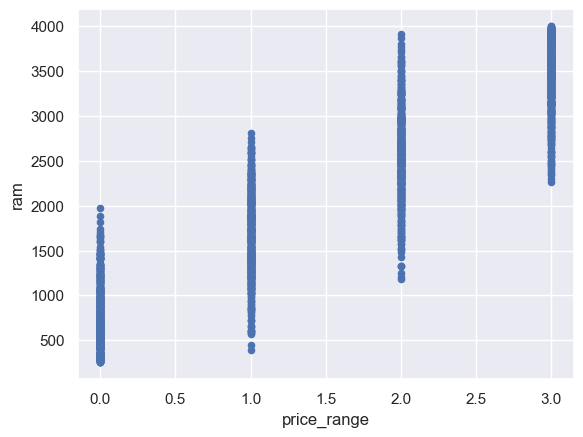

In [15]:
df.plot(x='price_range',y='ram',kind='scatter')
plt.show()

### *Ram is an important feature, because it indicates a rise on the price.*

### 4. Checking the relation between Battery Power along with price range.

<AxesSubplot: xlabel='price_range', ylabel='battery_power'>

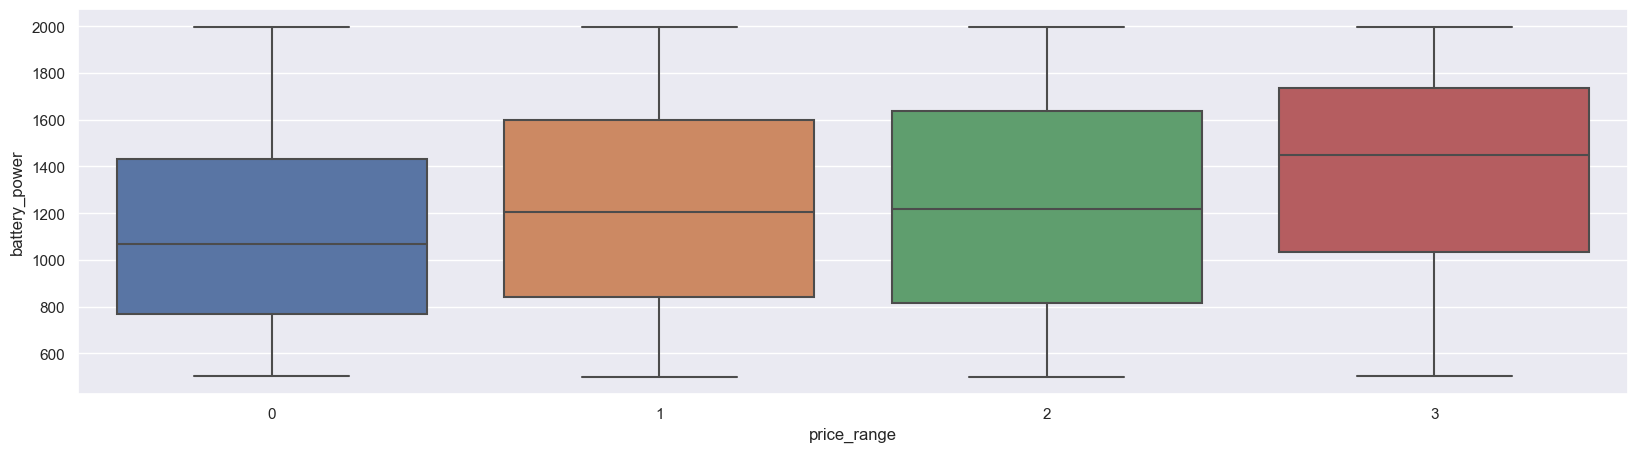

In [16]:
fig,ax=plt.subplots(figsize=(20,5))
sns.boxplot(data=df,x='price_range',y='battery_power',ax=ax)

### *We can say that the total energy a battery can store in one time measured in mAh affects the rise on price.*

### 4. Checking the relation between Pixel Width along with price range.

<AxesSubplot: xlabel='price_range', ylabel='px_width'>

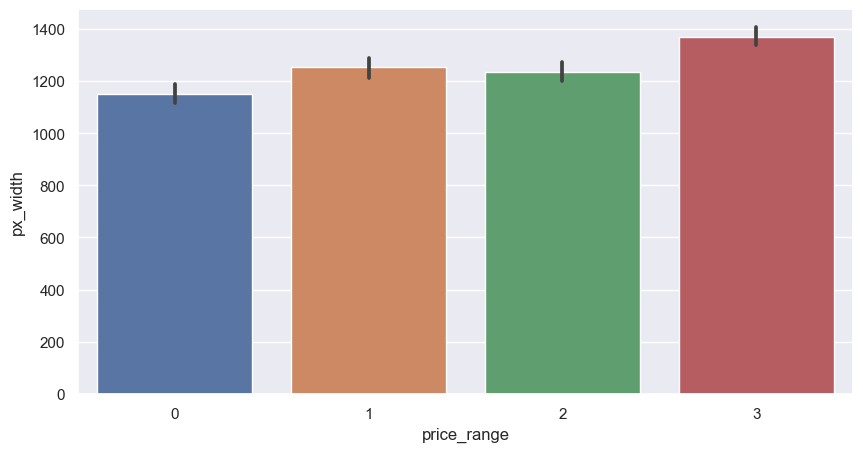

In [17]:
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(data=df,x='price_range',y='px_width',ax=ax)

### *From the boxplot, we see that there is an equal value between medium cost and high cost. But for very low to very high there is an increase in change.*

### 5. Plotting the Correlation matrix to identify the patterns in the dataset that we have

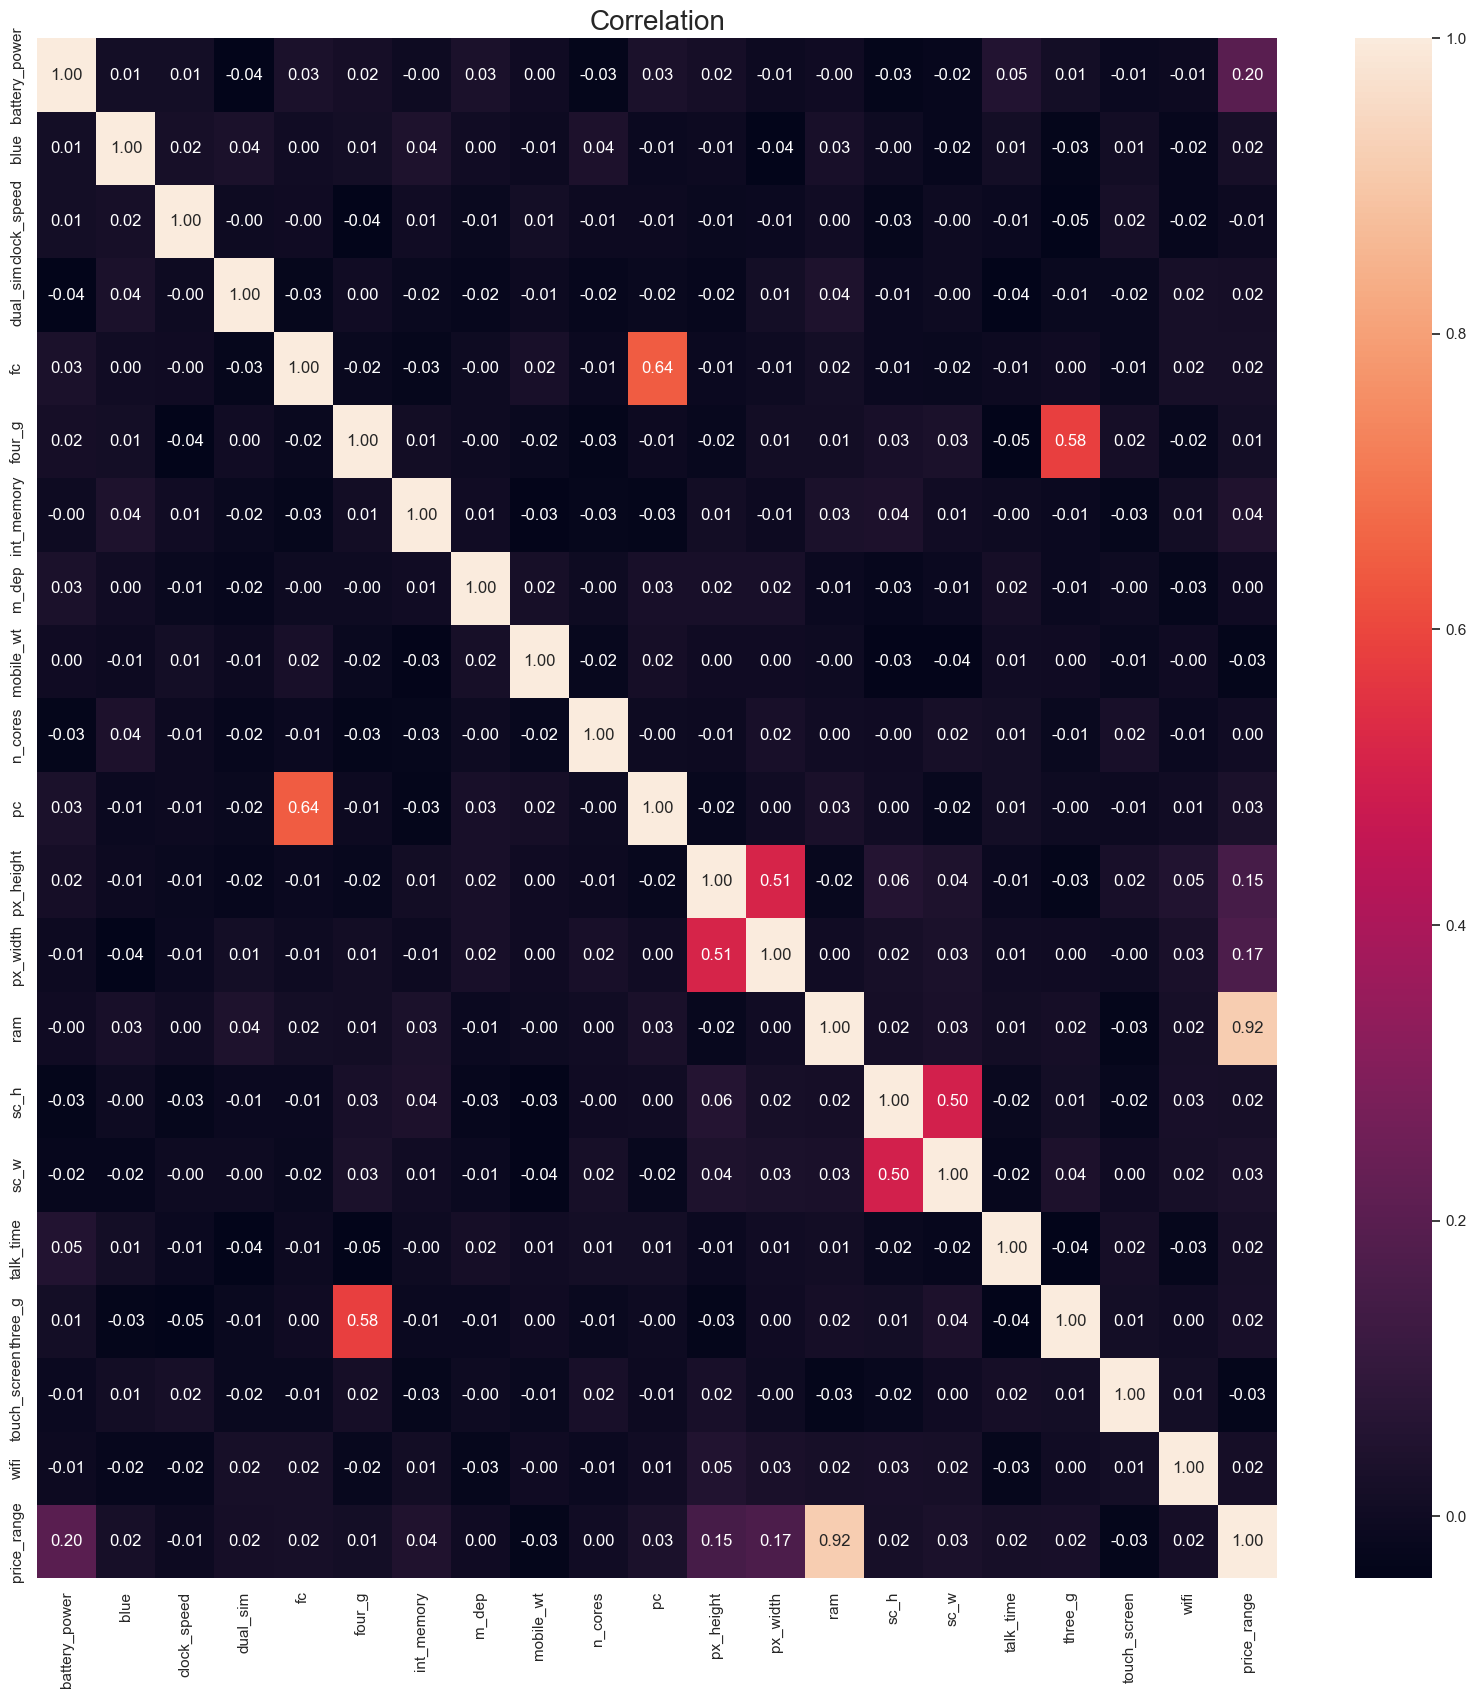

In [18]:
plt.figure(figsize = (20,20))
corrmat = df.corr()
sns.heatmap(corrmat, robust = True, annot = True, fmt= '.2f')
plt.title('Correlation', fontsize = 20)
plt.show()

#### *By the heatmap we can see, that RAM and Battery Power features have the most impact on price range*

#### 6. Let's plot a chart to see how Battery power and RAM affect price range

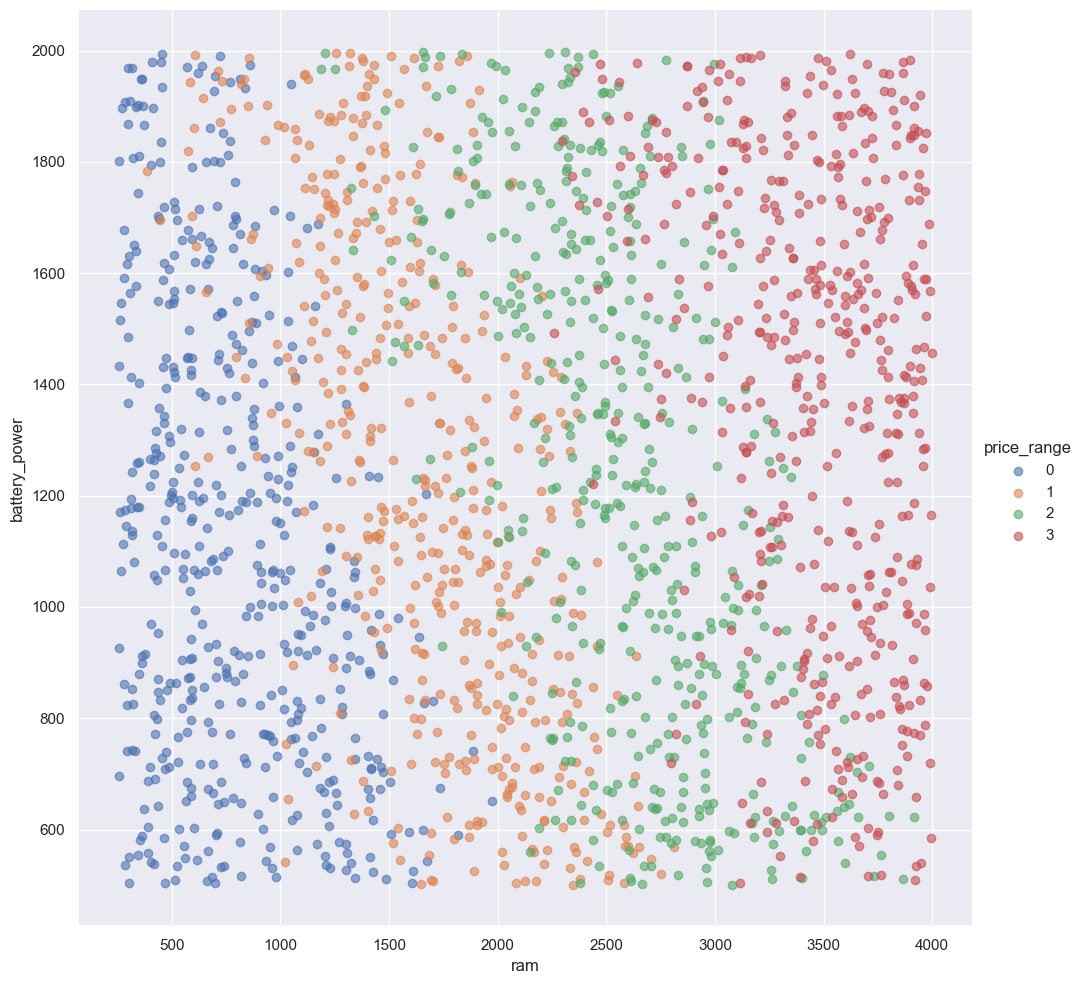

In [19]:
g = sns.FacetGrid(df,hue = 'price_range', height = 10)
g.map(plt.scatter, 'ram','battery_power',alpha = 0.6)
g.add_legend()
g.savefig("BatteryPower.png")

#### *From the chart we can see that when the price range is very high expensive (in red colour), Battery Power and RAM are increasing. So as their values increase, they indicate a rise in the price as we saw it in the charts that we did before.*

## Now, we will create different models to see how to get the best accuracy score.

In [20]:
# Defining X and y
X = df.drop(['price_range'], axis = 1)
y = df['price_range']

In [21]:
X.shape

(2000, 20)

In [22]:
y.shape

(2000,)

In [23]:
# Scaling values of X
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
# Splitting dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20, random_state = 42)

In [25]:
X_train.shape

(1600, 20)

In [26]:
y_train.shape

(1600,)

# 5.1 Logistic Regression

In [27]:
# Applying logistic regression

lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)


LogisticRegression(random_state=1)

In [28]:
# Prediction
y_pred_lr = lr.predict(X_test)
y_pred_lrtrain = lr.predict(X_train)

[[105   0   0   0]
 [  1  86   4   0]
 [  0   9  77   6]
 [  0   0   3 109]]


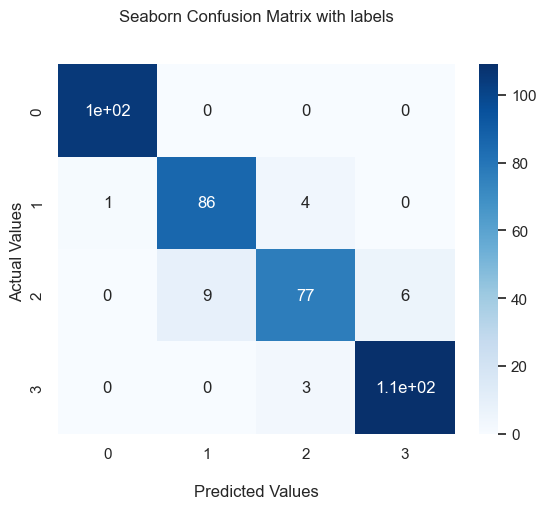

In [29]:
from sklearn.metrics import confusion_matrix
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_lr)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [30]:
lr_score = accuracy_score(y_test, y_pred_lr)
lr_scoretrain = accuracy_score(y_train,y_pred_lrtrain)
(lr_scoretrain, lr_score)

(0.9375, 0.9425)

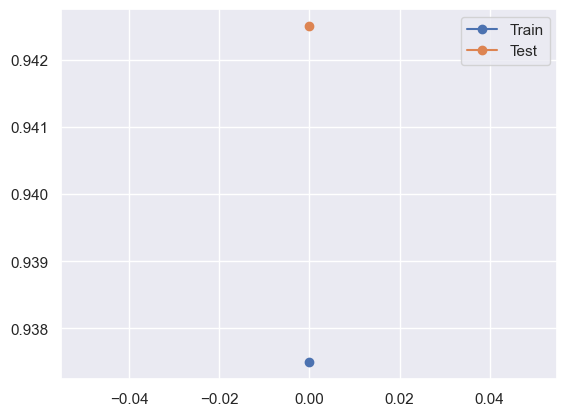

In [31]:
train_scores= []
test_scores = []
train_yhat = lr.predict(X_train)
train_acc = accuracy_score(y_train, train_yhat)
train_scores.append(train_acc)
 # evaluate on the test dataset
test_yhat = lr.predict(X_test)
test_acc = accuracy_score(y_test, test_yhat)
test_scores.append(test_acc)
# summarize progress
# plot of train and test scores vs tree depth
plt.plot( train_scores, '-o', label='Train')
plt.plot( test_scores, '-o', label='Test')
plt.legend()
plt.show()

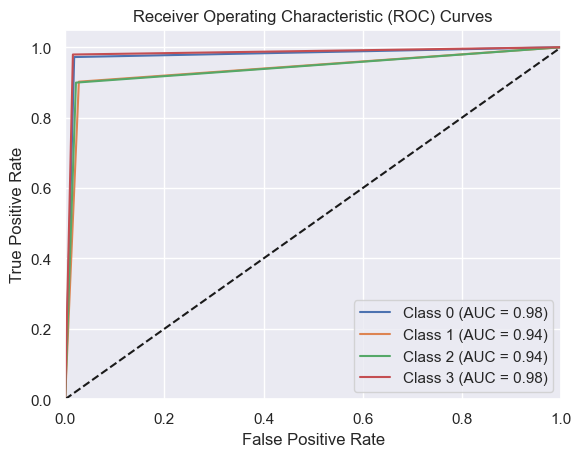

In [32]:
n_classes = 4

from sklearn.metrics import roc_curve,roc_auc_score
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train == i, y_pred_lrtrain == i)
    roc_auc[i] = roc_auc_score(y_train == i, y_pred_lrtrain ==i)

# Plot of a ROC curve for a specific class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='Class {0} (AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

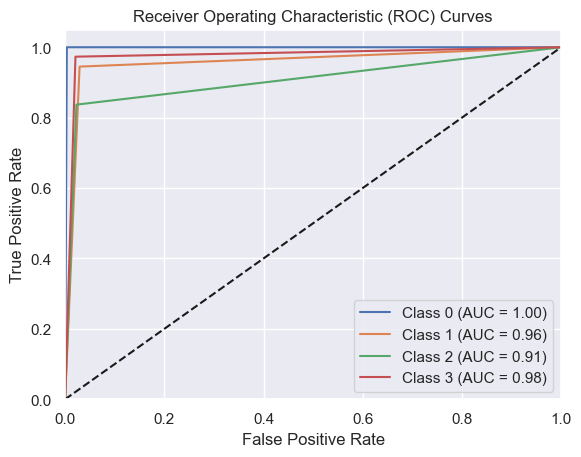

In [33]:
n_classes = 4

from sklearn.metrics import roc_curve,roc_auc_score
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred_lr == i)
    roc_auc[i] = roc_auc_score(y_test == i, y_pred_lr ==i)

# Plot of a ROC curve for a specific class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='Class {0} (AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

# Random Forest

In [34]:
# taking 300 trees
clsr = RandomForestClassifier(n_estimators=300, random_state=1)
clsr.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=1)

In [35]:
y_pred_clsr = clsr.predict(X_test)

In [36]:
clsr_score= accuracy_score(y_test, y_pred_clsr)
clsr_score

0.8925

In [37]:
print(classification_report(y_test, y_pred_clsr))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       105
           1       0.87      0.87      0.87        91
           2       0.81      0.85      0.83        92
           3       0.93      0.89      0.91       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



[[100   5   0   0]
 [  6  79   6   0]
 [  0   7  78   7]
 [  0   0  12 100]]


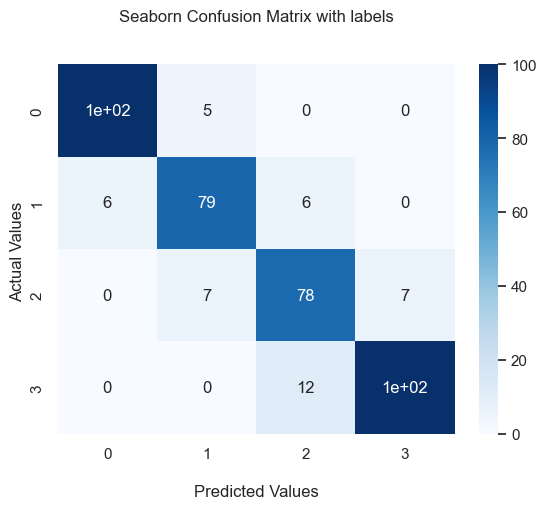

In [38]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_clsr)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [39]:

feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head()

,Feature,Score
0,ram,0.478114
1,battery_power,0.074026
2,px_width,0.056076
3,px_height,0.055694
4,mobile_wt,0.040964


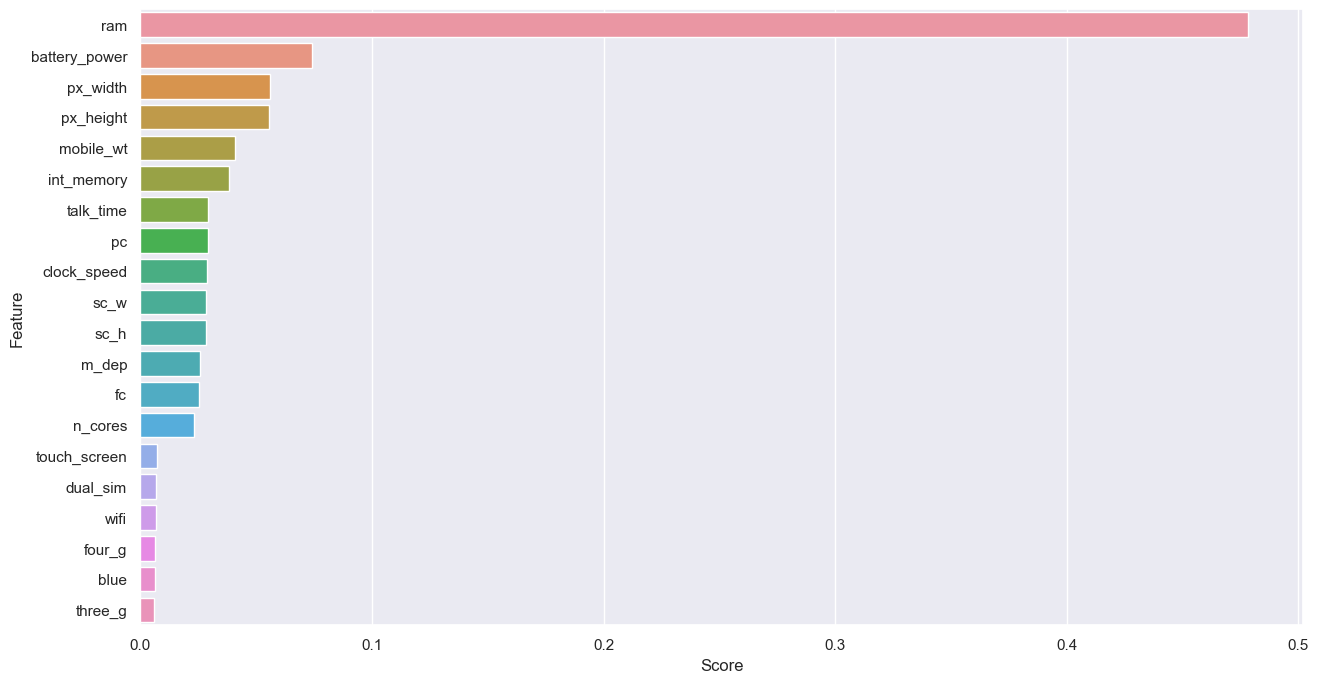

In [40]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()

# Decision tree

In [41]:
# Applying Decision Tree

dtc = DecisionTreeClassifier(max_depth = 5,random_state=1)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [42]:
# Prediction
y_pred_dtc = dtc.predict(X_test)

In [43]:
dt_score = accuracy_score(y_test, y_pred_dtc)
dt_score

0.8

In [44]:
# Evaluation metrics for test

print('Classification report for Decision Tree' )
print(classification_report(y_test,y_pred_dtc))

Classification report for Decision Tree
              precision    recall  f1-score   support

           0       0.94      0.87      0.90       105
           1       0.73      0.77      0.75        91
           2       0.66      0.73      0.69        92
           3       0.88      0.82      0.85       112

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.81      0.80      0.80       400



[[91 14  0  0]
 [ 6 70 15  0]
 [ 0 12 67 13]
 [ 0  0 20 92]]


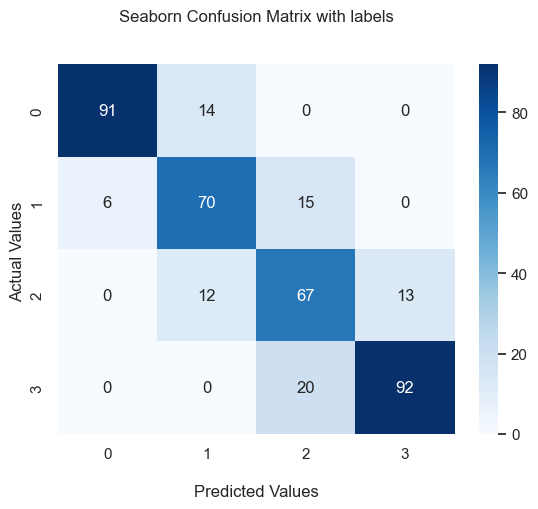

In [45]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_dtc)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [46]:
feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':dtc.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)
feature_importance.head()

,Feature,Score
0,ram,0.808429
1,battery_power,0.076955
2,px_height,0.067865
3,px_width,0.041364
4,m_dep,0.005387


# SVM Model

In [47]:
# Applying SVM
svc = svm.SVC(random_state=1)
svc.fit(X_train, y_train)

SVC(random_state=1)

In [48]:
# Prediction
y_pred_svc = svc.predict(X_test)


In [49]:
# Accuracy score
accuracy_svc = accuracy_score(y_test, y_pred_svc)
accuracy_svc

0.8675

In [50]:
print(confusion_matrix(y_test, y_pred_svc))

[[100   5   0   0]
 [  5  80   6   0]
 [  0  13  72   7]
 [  0   0  17  95]]


# SGD Model

In [51]:
# Applying SGD
sgd = SGDClassifier(random_state=1)
sgd.fit(X_train,y_train)

SGDClassifier(random_state=1)

In [52]:
# Prediction
y_pred_sgd = sgd.predict(X_test)

In [53]:
# Accuracy score
sgd_score = accuracy_score(y_test, y_pred_sgd)
sgd_score

0.8125

In [54]:
print(confusion_matrix(y_test, y_pred_sgd))

[[104   0   1   0]
 [  8  41  42   0]
 [  0  12  68  12]
 [  0   0   0 112]]


In [55]:
scores = pd.DataFrame({'Models': ['Logistic Regression','SVM','SGD','Decision Tree','Random Forest'], 
                       'Scores': [lr_score,accuracy_svc,sgd_score,dt_score,clsr_score]})
scores

,Models,Scores
0,Logistic Regression,0.9425
1,SVM,0.8675
2,SGD,0.8125
3,Decision Tree,0.8000
4,Random Forest,0.8925


### *From the evaluations of different models, we can see that the best model is Logistic Regression with 94.25% accuracy.*

# GridSearchCV to tune parameters of all the above models

### GridSearchCV for Logistic Regression

In [56]:
#set the parameters for Gridsearch

parameters = { "C": [0.001, 0.01, 0.1, 1,50,100], 'penalty': ['l2', 'l1'], 'solver': ['lbfgs','liblinear']}

lr1 = LogisticRegression(random_state=1)

lr1 = GridSearchCV(lr1, parameters, cv=5, scoring='accuracy')

lr1.fit(X_train,y_train)

print(f' Best parameter: {lr1.best_params_}\n Best Estimator: {lr1.best_estimator_}\n Best Score: {lr1.best_score_}')

 Best parameter: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
 Best Estimator: LogisticRegression(C=100, random_state=1)
 Best Score: 0.959375


In [57]:
best_model = lr1.best_estimator_

y_pred = best_model.predict(X_test)
y_predtrain= best_model.predict(X_train)

lr1_score = accuracy_score(y_test, y_pred)
lr1_scoretrain = accuracy_score(y_train,y_predtrain)
[lr1_scoretrain,lr1_score]

[0.983125, 0.975]

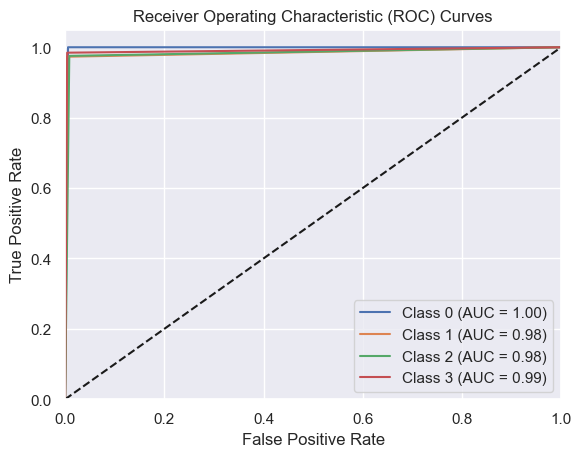

In [58]:
n_classes = 4

from sklearn.metrics import roc_curve,roc_auc_score
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train == i, y_predtrain == i)
    roc_auc[i] = roc_auc_score(y_train == i, y_predtrain ==i)

# Plot of a ROC curve for a specific class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='Class {0} (AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

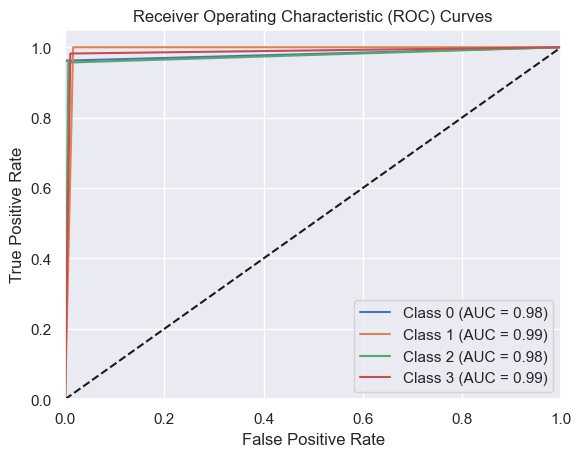

In [59]:
n_classes = 4

from sklearn.metrics import roc_curve,roc_auc_score
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred == i)
    roc_auc[i] = roc_auc_score(y_test == i, y_pred ==i)

# Plot of a ROC curve for a specific class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='Class {0} (AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

### GridSearchCV for Decision Tree

In [60]:
#set the parameters for Gridsearch
parameters = { "max_depth": [3, 5, 7, 9, 11, 13], 'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt'],'criterion': ['gini', 'entropy']}

dt1 = DecisionTreeClassifier(random_state=1)

dt1 = GridSearchCV(dt1, parameters, cv=5, scoring='accuracy',n_jobs=-1)

dt1.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 11, 13],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [61]:
print(f' Best parameter: {dt1.best_params_}\n Best Estimator: {dt1.best_estimator_}\n Best Score: {dt1.best_score_}')

 Best parameter: {'criterion': 'entropy', 'max_depth': 13, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}
 Best Estimator: DecisionTreeClassifier(criterion='entropy', max_depth=13, max_features='auto',
                       random_state=1)
 Best Score: 0.6125


In [62]:
best_model_dt = dt1.best_estimator_

y_pred_dt1 = best_model_dt.predict(X_test)

dt1_score = accuracy_score(y_test, y_pred_dt1)
dt1_score

0.6925

### GridSearchCV for Random Forest

In [63]:
#set the parameters for Gridsearch
parameters = {'n_estimators': [10, 50, 100],
              'max_depth': [1, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'criterion': ['gini', 'entropy']}

rf1 = RandomForestClassifier(random_state=1)

rf1 = GridSearchCV(rf1, parameters, cv=5, scoring='accuracy', n_jobs=-1)

rf1.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 5, 10], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

In [64]:
print(f' Best parameter: {rf1.best_params_}\n Best Estimator: {rf1.best_estimator_}\n Best Score: {rf1.best_score_}')

 Best parameter: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
 Best Estimator: RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=5,
                       n_estimators=50, random_state=1)
 Best Score: 0.874375


In [65]:
best_model_rf1 = rf1.best_estimator_

y_pred_rf1 = best_model_rf1.predict(X_test)

rf1_score = accuracy_score(y_test, y_pred_rf1)
rf1_score

0.8825

### GridSearchCV for Support Vector Machine

In [66]:
#set the parameters for Gridsearch

parameters = { "C": [0.001, 0.01, 0.1, 1, 10,50,100], 'kernel': ['linear','rbf']}

svc1 = SVC(random_state=1)

svc1 = GridSearchCV(svc1, parameters, cv=5, scoring='accuracy')

svc1.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=1),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 50, 100],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [67]:
print(f' Best parameter: {svc1.best_params_}\n Best Estimator: {svc1.best_estimator_}\n Best Score: {svc1.best_score_}')

 Best parameter: {'C': 100, 'kernel': 'linear'}
 Best Estimator: SVC(C=100, kernel='linear', random_state=1)
 Best Score: 0.9568749999999999


In [68]:
best_model_svc1 = svc1.best_estimator_

y_pred_svc1 = best_model_svc1.predict(X_test)

svc1_score = accuracy_score(y_test, y_pred_svc1)
svc1_score

0.975

### GridSearchCV for Stochastic Gradient Descent (SGD)

In [69]:
#set the parameters for Gridsearch
parameters = {'loss': ['hinge', 'log', 'modified_huber'], 'penalty': ['l2', 'l1'], 
              'alpha': [0.01, 0.001, 0.0001],'eta0': [0.01, 0.001, 0.0001],
              }

sgd1 = SGDClassifier(random_state=1)

sgd1 = GridSearchCV(sgd1, parameters, cv=5, scoring='accuracy', n_jobs=-1)

sgd1.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SGDClassifier(random_state=1), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.001, 0.0001],
                         'eta0': [0.01, 0.001, 0.0001],
                         'loss': ['hinge', 'log', 'modified_huber'],
                         'penalty': ['l2', 'l1']},
             scoring='accuracy')

In [70]:
print(f' Best parameter: {sgd1.best_params_}\n Best Estimator: {sgd1.best_estimator_}\n Best Score: {sgd1.best_score_}')

 Best parameter: {'alpha': 0.01, 'eta0': 0.01, 'loss': 'modified_huber', 'penalty': 'l1'}
 Best Estimator: SGDClassifier(alpha=0.01, eta0=0.01, loss='modified_huber', penalty='l1',
              random_state=1)
 Best Score: 0.8400000000000001


In [71]:
best_model_sgd1 = sgd1.best_estimator_

y_pred_sgd1 = best_model_sgd1.predict(X_test)

sgd1_score = accuracy_score(y_test, y_pred_sgd1)
sgd1_score

0.88

### Getting a dataframe of all the scores of models that we used with GridSearchCV

In [72]:
scores = pd.DataFrame({'Models': ['Logistic Regression','SVM','SGD','Decision Tree','Random Forest'], 
                       'Scores': [lr1_score,svc1_score,sgd1_score,dt1_score,rf1_score]})
scores

,Models,Scores
0,Logistic Regression,0.9750
1,SVM,0.9750
2,SGD,0.8800
3,Decision Tree,0.6925
4,Random Forest,0.8825


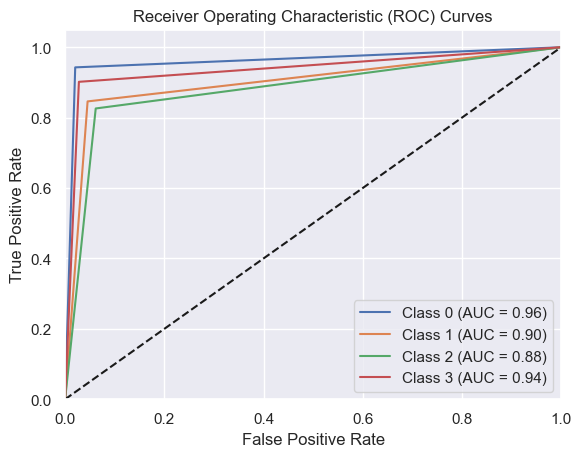

In [73]:
n_classes = 4

from sklearn.metrics import roc_curve,roc_auc_score
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred_rf1 == i)
    roc_auc[i] = roc_auc_score(y_test == i, y_pred_rf1 ==i)

# Plot of a ROC curve for a specific class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='Class {0} (AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

#### *The best model using GridSearchCV is Logistic Regression with accuracy 97.5%*

# Removing Features

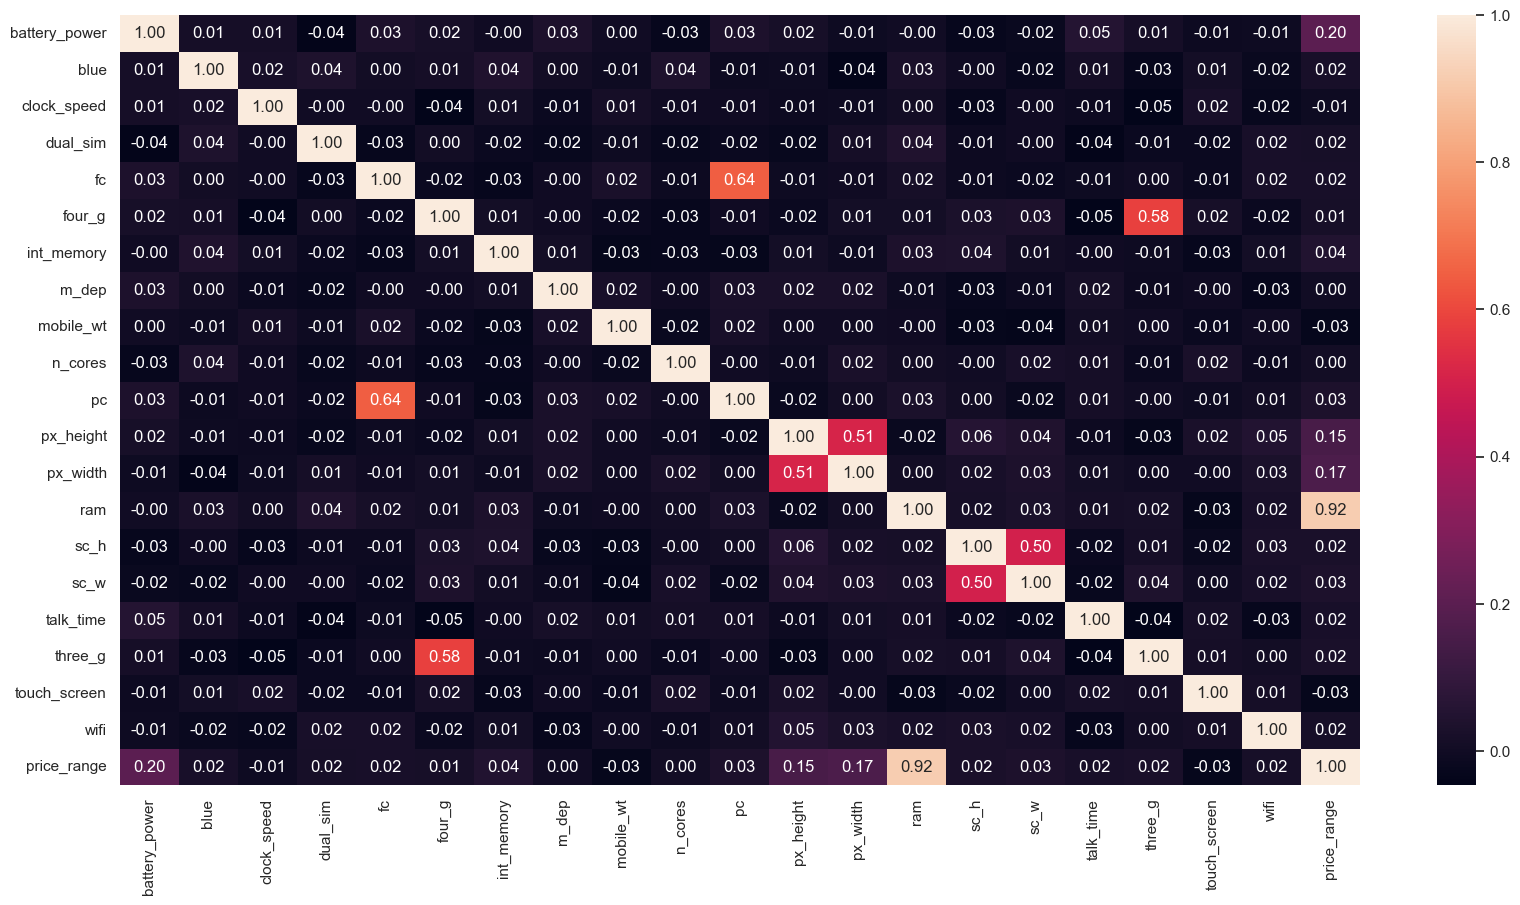

In [74]:
# Plotting heatmap to see some important features
plt.figure(figsize = (20,10))
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, fmt= '.2f' )
plt.show()

### Based on the above heatmap we are removing some features with respect to price_range and evaluating the model performance.

In [75]:
threshold = 0.03

# select features that have a correlation coefficient above the threshold
features_to_keep = df[corr[corr['price_range']>=threshold].index]

train = features_to_keep
train

,battery_power,int_memory,pc,px_height,px_width,ram,sc_w,price_range
0,842,7,2,20.0,756,2549,7.0,1
1,1021,53,6,905.0,1988,2631,3.0,2
2,563,41,6,1263.0,1716,2603,2.0,2
3,615,10,9,1216.0,1786,2769,8.0,2
4,1821,44,14,1208.0,1212,1411,2.0,1
...,...,...,...,...,...,...,...,...
1995,794,2,14,1222.0,1890,668,4.0,0
1996,1965,39,3,915.0,1965,2032,10.0,2
1997,1911,36,3,868.0,1632,3057,1.0,3
1998,1512,46,5,336.0,670,869,10.0,0


In [76]:
X = train.drop('price_range',axis=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit((X))
X = scaler.transform(X)
y = train['price_range']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

## Logistic Regression Model after removing features

In [78]:
#set the parameters for Gridsearch
parameters = { "C": [0.001, 0.01, 0.1, 1,50,100], 'penalty': ['l2', 'l1'], 'solver': ['lbfgs','liblinear']}

lr2 = LogisticRegression(random_state=1)

lr2 = GridSearchCV(lr2, parameters, cv=5, scoring='accuracy')

lr2.fit(X_train,y_train)
best_model = lr2.best_estimator_

y_pred2 = best_model.predict(X_test)
y_pred2train = best_model.predict(X_train)

lr2_score = accuracy_score(y_test, y_pred2)
lr2_scoretrain = accuracy_score(y_train,y_pred2train)

lr2_scoretrain,lr2_score

(0.965625, 0.9525)

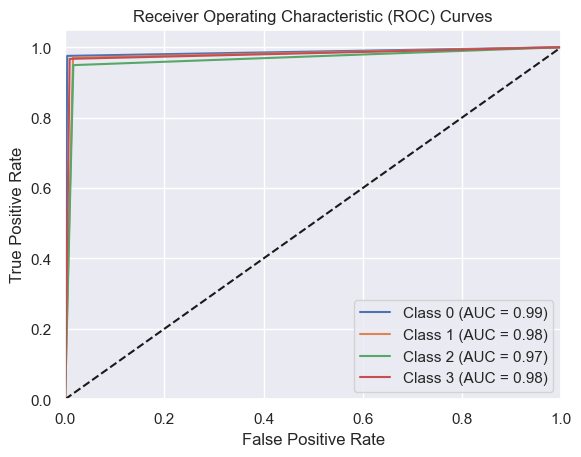

In [79]:
n_classes = 4

from sklearn.metrics import roc_curve,roc_auc_score
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train == i, y_pred2train == i)
    roc_auc[i] = roc_auc_score(y_train == i, y_pred2train ==i)

# Plot of a ROC curve for a specific class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='Class {0} (AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

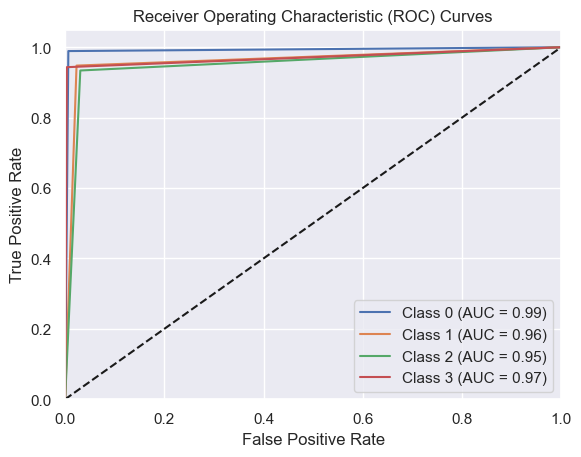

In [80]:
n_classes = 4

from sklearn.metrics import roc_curve,roc_auc_score
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred2 == i)
    roc_auc[i] = roc_auc_score(y_test == i, y_pred2 ==i)

# Plot of a ROC curve for a specific class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='Class {0} (AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

## SVM Model after removing features

In [81]:
#set the parameters for Gridsearch
parameters = { "C": [0.001, 0.01, 0.1, 1, 10,50,100]}

svc2 = SVC(random_state=1)

svc2 = GridSearchCV(svc2, parameters, cv=5, scoring='accuracy', n_jobs=-1)

svc2.fit(X_train,y_train)
best_model_svc = svc2.best_estimator_

y_pred_svc2 = best_model_svc.predict(X_test)

svc2_score = accuracy_score(y_test, y_pred_svc2)
svc2_score

0.9125

## Decision Tree Classifier Model after removing features

In [82]:
parameters = { "max_depth": [3, 5, 7, 9, 11, 13], 'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt'],'criterion': ['gini', 'entropy']}

dt2 = DecisionTreeClassifier(random_state=1)

dt2 = GridSearchCV(dt2, parameters, cv=5, scoring='accuracy',n_jobs=-1)

dt2.fit(X_train,y_train)
best_model_dt2 = dt2.best_estimator_

y_pred_dt2 = best_model_dt2.predict(X_test)

dt2_score = accuracy_score(y_test, y_pred_dt2)
dt2_score

0.565

## Random Forest Model after removing features

In [83]:
parameters = {'n_estimators': [10, 50, 100],
              'max_depth': [1, 5, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'criterion': ['gini', 'entropy']}

rf2 = RandomForestClassifier(random_state=1)

rf2 = GridSearchCV(rf2, parameters, cv=5, scoring='accuracy', n_jobs=-1)

rf2.fit(X_train,y_train)
best_model_rf2 = rf2.best_estimator_

y_pred_rf2 = best_model_rf2.predict(X_test)

rf2_score = accuracy_score(y_test, y_pred_rf2)
rf2_score

0.8875

## SGD Model after removing features

In [84]:
parameters = {'loss': ['hinge', 'log', 'modified_huber'], 'penalty': ['l2', 'l1'], 
              'alpha': [0.01, 0.001, 0.0001],'eta0': [0.01, 0.001, 0.0001],
              }

sgd2 = SGDClassifier(random_state=1)

sgd2 = GridSearchCV(sgd2, parameters, cv=5, scoring='accuracy', n_jobs=-1)

sgd2.fit(X_train,y_train)

best_model_sgd2 = sgd2.best_estimator_

y_pred_sgd2 = best_model_sgd2.predict(X_test)

sgd2_score = accuracy_score(y_test, y_pred_sgd2)
sgd2_score

0.85

In [85]:
scores = pd.DataFrame({'Models': ['Logistic Regression','SVM','SGD','Decision Tree','Random Forest'], 
                       'Scores': [lr2_score,svc2_score,sgd2_score,dt2_score,rf2_score]})
scores

,Models,Scores
0,Logistic Regression,0.9525
1,SVM,0.9125
2,SGD,0.8500
3,Decision Tree,0.5650
4,Random Forest,0.8875


### *The best model after removing features below the threshold is SVM with 95.25% accuracy score.*

# CONCLUSION: 

* **The mobile prices are classified in 4 price ranges: 0 - low cost, 1 - medium cost, 2 - high cost and 3 - very high cost in a similar spread for each.**
* **RAM and Battery Power are two of the most important features that indicate the price of the mobiles from low to high.**
* **From the experiments we can say that:**
 1. **The best model is Logistic Regression with 94.25% accuracy.**
 2. **The best model using GridSearchCV is Logistic Regression and SVM with accuracy 97.5%**
 3. **The best model after removing features below the threshold is still Logistic Regression with 95.25% accuracy.**
 
 **Logistic Regression works pretty well for our dataset.**